<span style="display: flex; align-items: center;">
    <img src="../images/Australian-Apparel-Limited-Logo.png" alt="Australian Apparel Ltd" width="100"/>
    <h2 style="margin-left: 20px;">Australian Apparel Ltd.<br/>Sales Analytics Dashboard - Q4, 2020</h2>
</span>

## Notebook Overview

This notebook presents a comprehensive sales analysis dashboard for Australian Apparel Limited (AAL) for the fourth quarter of 2020. The analysis aims to provide actionable insights to support data-driven decision-making for future business expansion and sales strategies.

NOTE: This is a mock dashboard (static).

## Objectives

1. Identify the states generating the highest revenues
2. Analyze sales performance across different demographic groups
3. Examine trends in sales data
4. Provide insights to assist in developing sales programs for lower-performing states

## Data Description

The analysis is based on AAL's sales data for Q4 2020, which includes the following key information:

- Date and Time of sales
- State where the sale occurred
- Customer demographic group (Men, Women, Kids, Seniors)
- Number of units sold
- Sales amount

## Dashboard Components

The analysis covers six main areas:

1. Total Sales by State
2. Sales by Demographic Group for each State
3. Monthly Sales Trend
4. Weekly Sales Comparison
5. Sales Distribution by Time of Day
6. Sales Distribution by Customer Group

Each of these components will be visualized and analyzed to extract meaningful insights for AAL's sales and marketing strategies.

## Methodology

This project utilizes Python libraries including pandas for data manipulation, and matplotlib and seaborn for data visualization. The analysis involves:

1. Data preprocessing and cleaning (completed in prior notebooks)
2. Aggregation and grouping of sales data using pandas' advanced grouping operations
3. Creation of a modular, well-documented codebase for data visualization
4. Implementation of various chart types to represent different aspects of the sales data
5. Utilization of advanced Python features such as type hinting and multi-line docstrings
6. Interpretation of visualizations to derive actionable insights
7. Formulation of data-driven recommendations based on the comprehensive analysis

## Rationale for Dashboard Design Decisions

1. **Selection of Six Main Components:** 
   The dashboard focuses on six key areas as guided by the problem statement: Total Sales by State, Sales by Demographic Group, Monthly and Weekly Trends, Time of Day Distribution, and Customer Group Distribution. This selection provides a comprehensive yet concise overview of AAL's sales performance, addressing the primary objectives of identifying high-performing states, analyzing demographic trends, and examining patterns in sales data.

2. **Use of Various Chart Types:**
   - Horizontal bar charts for state-wise comparisons: Effective for comparing categorical data across different states, with states ordered by sales volume for easy identification of top and bottom performers.
   - Stacked horizontal bar charts for demographic analysis: Allows for easy comparison of sales distribution across groups within each state, maintaining the same state order as the total sales chart for consistency.
   - Line charts for monthly sales trends: Best for showing overall trends over the three-month period, with clear markers for each data point.
   - Bar charts for weekly sales comparison: Provides a more granular view of sales trends, allowing for identification of peak weeks and potential correlation with events or promotions.
   - Pie charts for distribution analysis: Offers a clear visual representation of how sales are divided among different categories (time of day and customer groups), suitable for datasets with few categories.

3. **Color Scheme and Styling:**
   A consistent color scheme and style dictionary were implemented throughout the dashboard to ensure visual coherence and to make it easier for viewers to associate colors with specific categories across different charts. This decision enhances the professional appearance of the dashboard and improves data interpretation.

4. **Layout Decision:**
   The 2x3 grid layout was chosen to present all key information on a single view, allowing for quick comparisons and overall assessment of sales performance. This layout balances the need for detailed information with the requirement for a concise, easy-to-understand dashboard. The arrangement of plots considers the logical flow of information, from overall state performance to more detailed time-based and demographic analyses.

5. **Focus on Q4 Data:**
   Concentrating on Q4 2020 allows for a detailed analysis of holiday season sales, typically a crucial period for retail businesses. This focus helps in understanding seasonal trends and planning for future holiday seasons, while also aligning with the provided dataset's timeframe.

6. **Combination of Geographic and Demographic Analysis:**
   By analyzing sales both by state and by customer group, the dashboard provides insights that can inform both regional marketing strategies and product development tailored to specific demographic segments. This multi-dimensional approach supports more targeted decision-making.

7. **Code Structure and Documentation:**
   The implementation of modular functions for each plot, comprehensive type hinting, and detailed multi-line comments explaining the rationale behind each visualization choice reflects a professional approach to code organization. This structure enhances maintainability and allows for easier future modifications or expansions of the dashboard.

8. **Performance Considerations:**
   Data aggregations are performed upfront and stored in variables to optimize performance, especially when dealing with large datasets. This approach reduces redundant calculations and improves the overall efficiency of the dashboard.

These design decisions were made to create a dashboard that is informative, easy to interpret, and directly addresses the key objectives of the sales analysis project for AAL. The resulting visualization tool not only provides valuable insights but also demonstrates a professional approach to data analysis and visualization in Python.

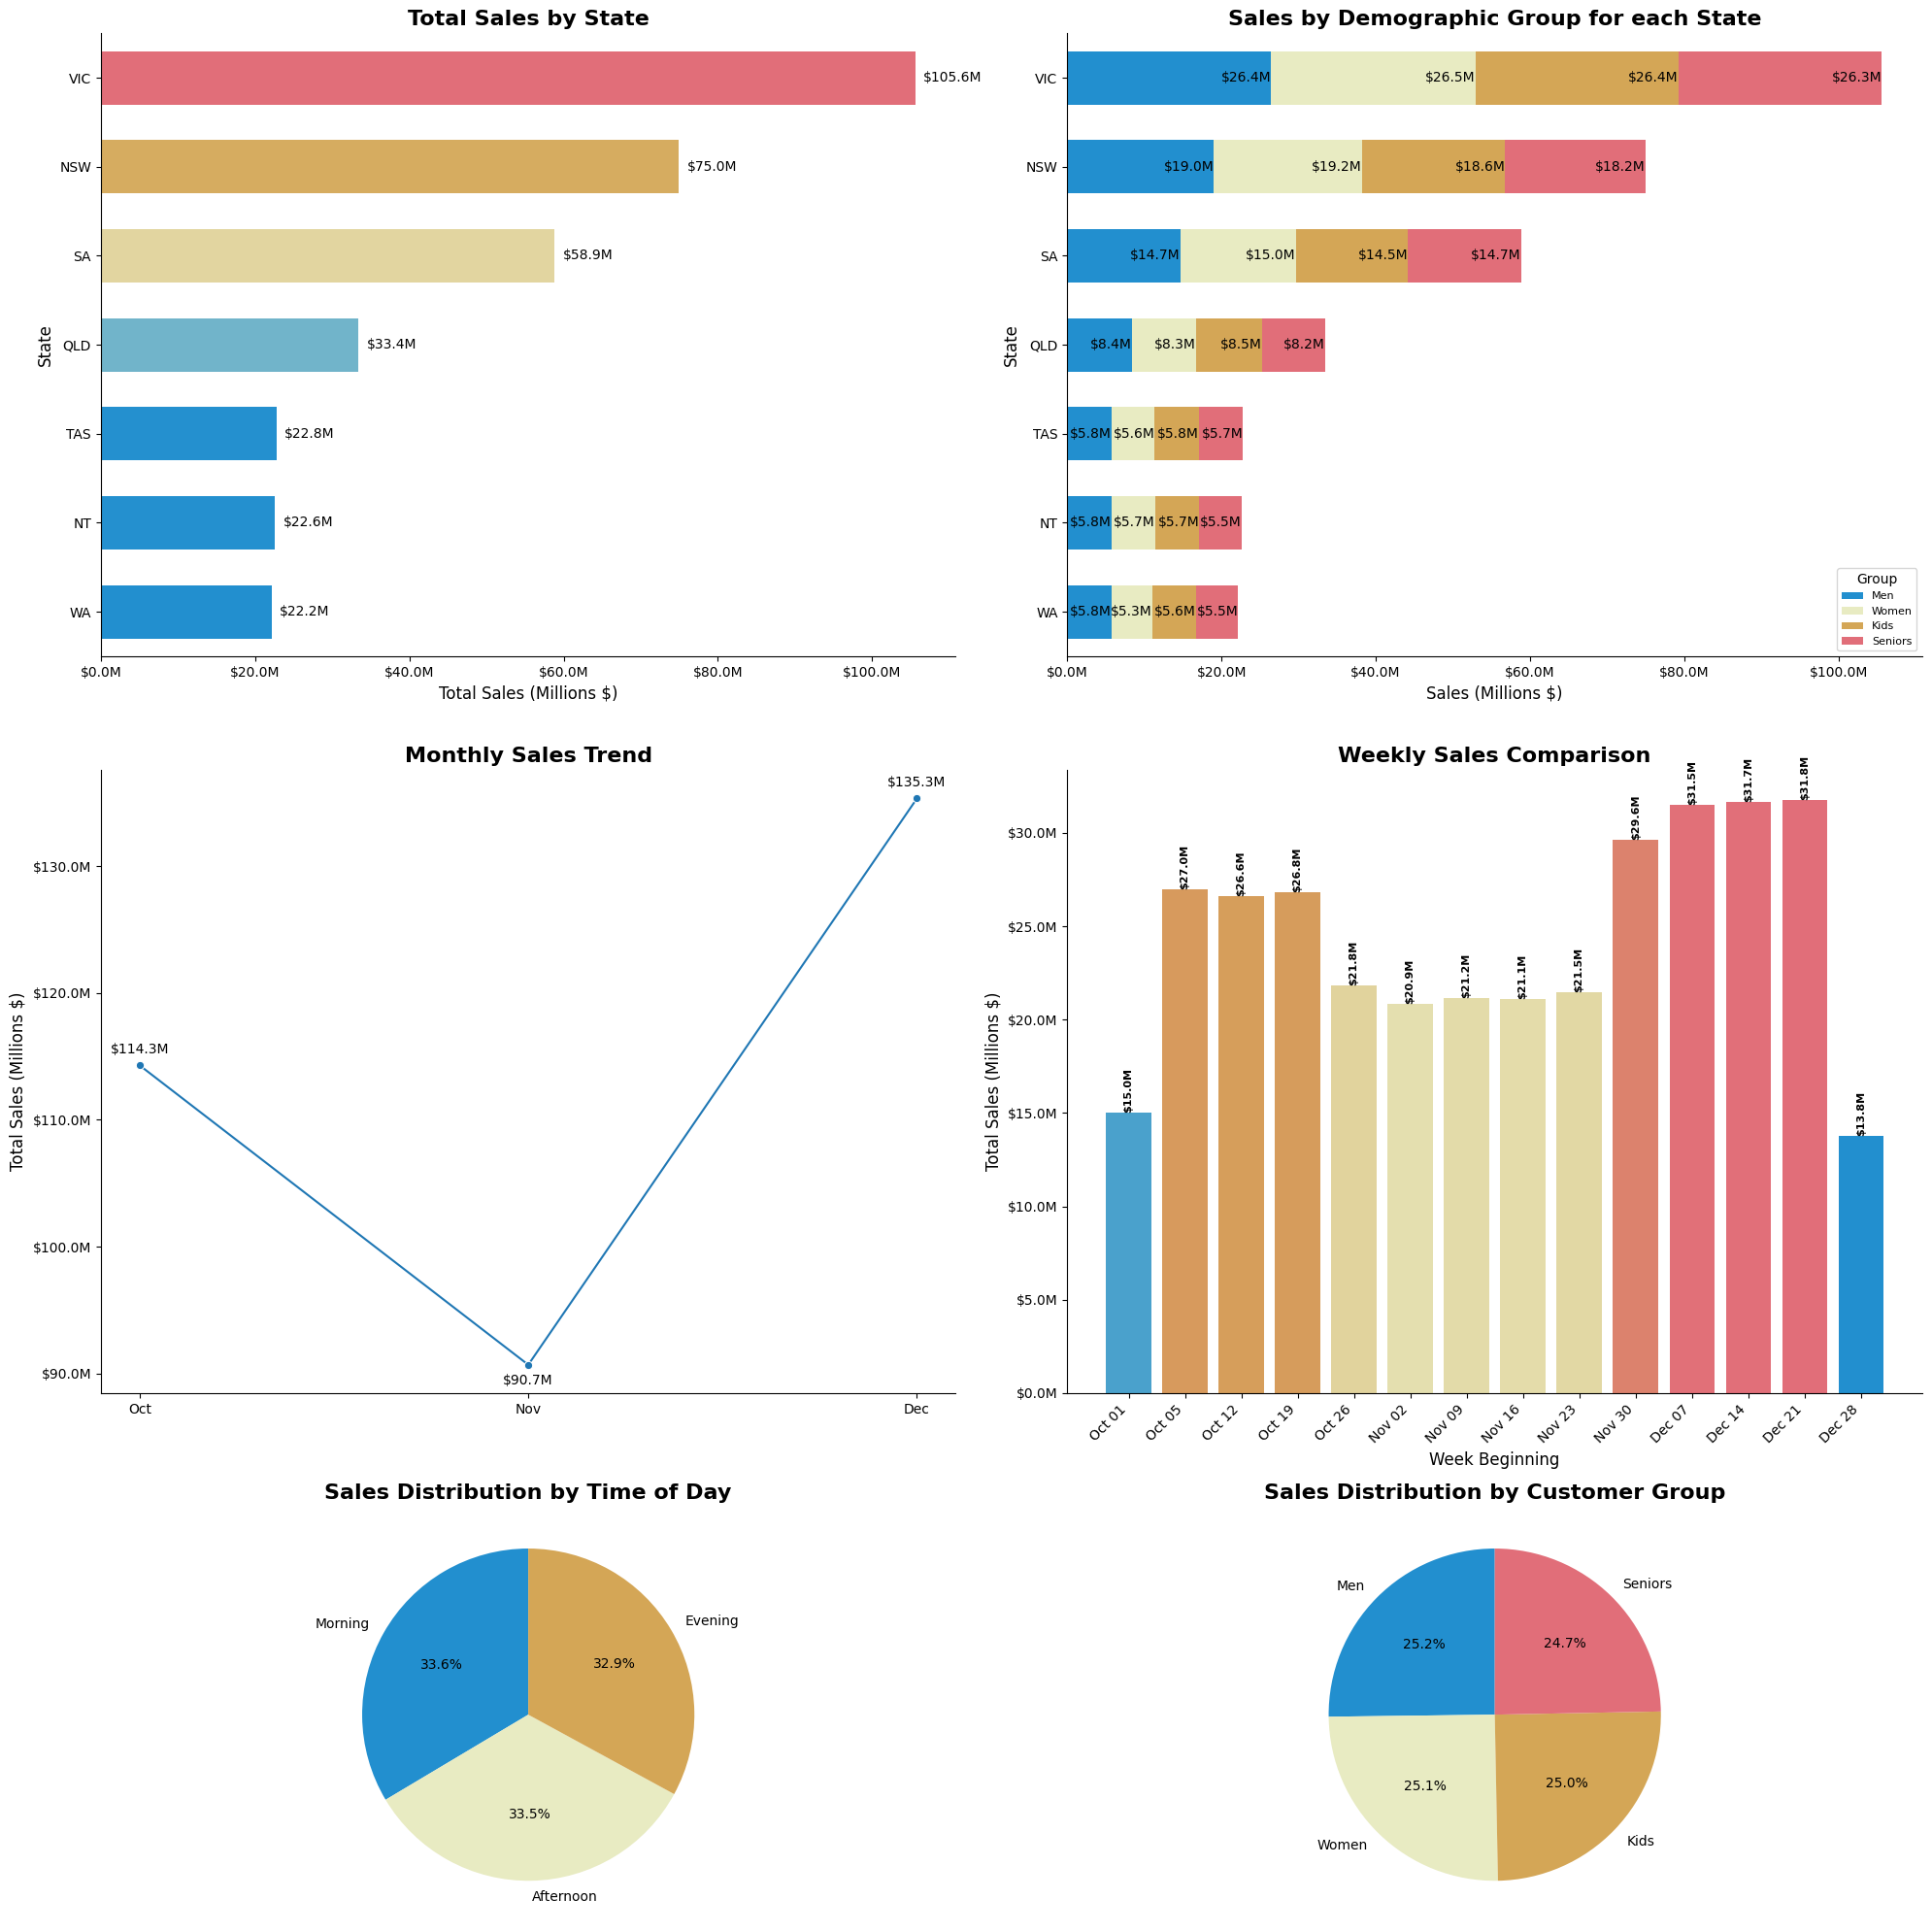

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer
from typing import Tuple, List

#------------------------------------------------------------------------------
# Helper Functions
#------------------------------------------------------------------------------
"""
These functions are defined to reduce code repetition and improve readability.
They encapsulate common operations used across multiple plots.

Rationale: These helper functions promote code reusability 
and maintainability. This approach enables me to make changes in one place 
that will affect multiple plots, ensuring consistency and reducing the 
chance of errors.
"""

def format_millions(x: float, p) -> str:
    return f'${x/1e6:.1f}M'

def remove_spines(ax: plt.Axes) -> None:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def create_color_map(data: pd.Series, colors: List[str]) -> Tuple[plt.cm.colors.LinearSegmentedColormap, plt.Normalize]:
    norm = plt.Normalize(data.min(), data.max())
    return plt.cm.colors.LinearSegmentedColormap.from_list("", colors), norm

def create_horizontal_bar_plot(ax: plt.Axes, data: pd.Series, title: str, xlabel: str, ylabel: str, bar_height: float, colors: np.ndarray) -> BarContainer:
    bars = ax.barh(y=data.index, width=data.values, height=bar_height, color=colors)
    ax.set_title(title, **plot_style['title'])
    ax.set_xlabel(xlabel, **plot_style['label'])
    ax.set_ylabel(ylabel, **plot_style['label'])
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_millions))
    remove_spines(ax)
    return bars

#------------------------------------------------------------------------------
# Style Dictionary
#------------------------------------------------------------------------------
"""
This dictionary defines consistent styling for plot elements across all visualizations.

Rationale: Using a style dictionary ensures visual consistency across all plots
and makes it easy to update styles globally. This approach separates style 
definitions from plot creation, improving code organization and maintainability.
"""

plot_style: dict = {
    'title': {'fontsize': 16, 'fontweight': 'bold'},
    'label': {'fontsize': 12},
    'tick': {'fontsize': 10},
    'legend': {'fontsize': 8, 'title_fontsize': 10}
}

#------------------------------------------------------------------------------
# AAL Color Palette
#------------------------------------------------------------------------------
"""
This color palette is specifically chosen to represent AAL's brand colors.

Rationale: Using a consistent color palette that aligns with AAL's branding
creates a cohesive and professional look for the dashboard. It also ensures
that the visualizations are immediately recognizable as being associated with AAL.
"""

colors: List[str] = ['#228FCF', '#E8EBC2', '#D4A656', '#E16E79']

#------------------------------------------------------------------------------
# Load and Prepare Data
#------------------------------------------------------------------------------
"""
This section loads the raw data and performs initial data transformations.

Rationale: Separating data loading and preparation from analysis allows for 
cleaner code organization. It also makes it easier to modify data preparation 
steps without affecting the rest of the analysis.
"""

df: pd.DataFrame = pd.read_csv('../data/processed/cleaned_sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.strftime('%b')

#------------------------------------------------------------------------------
# Data Aggregations
#------------------------------------------------------------------------------
"""
This section performs various data aggregations needed for the plots.

Rationale: Precomputing these aggregations improves code readability and 
performance. It separates the data preparation logic from the visualization 
logic, making the code easier to understand and maintain.
"""

state_sales: pd.Series = df.groupby('State')['Sales'].sum().sort_values(ascending=True)
state_demo_sales: pd.DataFrame = df.groupby(['State', 'Group'])['Sales'].sum().unstack()[['Men', 'Women', 'Kids', 'Seniors']]
state_demo_sales = state_demo_sales.reindex(state_sales.index)
monthly_sales: pd.Series = df.groupby('Month')['Sales'].sum()
weekly_sales: pd.Series = df.groupby('Week')['Sales'].sum()
time_sales: pd.Series = df.groupby('Time')['Sales'].sum().reindex(['Morning', 'Afternoon', 'Evening'])
group_sales: pd.Series = df.groupby('Group')['Sales'].sum().reindex(['Men', 'Women', 'Kids', 'Seniors'])

# Create a dictionary to map week numbers to their start dates
week_to_date: pd.Series = df.groupby('Week')['Date'].min().dt.strftime('%b %d')

# Set up the plot
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(3, 2, height_ratios=[1.5, 1.5, 1])

#------------------------------------------------------------------------------
# Plot 1: Total Sales by State
#------------------------------------------------------------------------------
"""
This plot displays the total sales for each state in ascending order.
It uses a horizontal bar chart with a color gradient to represent sales volume.
Value labels are added to the end of each bar for easy reading.

Rationale:
- Horizontal bar charts are excellent for comparing categorical data (states).
- The ascending order quickly reveals the highest and lowest performing states.
- Color gradient adds a visual cue to reinforce the sales volume differences.
- Value labels provide precise figures, enhancing the chart's informativeness.
"""

def plot_total_sales_by_state(ax: plt.Axes, state_sales: pd.Series) -> plt.Axes:
    color_map, norm = create_color_map(state_sales, colors)
    bars = create_horizontal_bar_plot(ax, state_sales, 'Total Sales by State', 
                                      'Total Sales (Millions $)', 'State', 0.6, 
                                      color_map(norm(state_sales.values)))
    
    # Add value labels
    for i, v in enumerate(state_sales.values):
        ax.text(v + (state_sales.max() * 0.01), i, format_millions(v, None), 
                va='center', ha='left', **plot_style['tick'])
    
    return ax

ax1 = fig.add_subplot(gs[0, 0])
ax1 = plot_total_sales_by_state(ax1, state_sales)

#------------------------------------------------------------------------------
# Plot 2: Sales by Demographic Group for each State
#------------------------------------------------------------------------------
"""
This plot shows the sales distribution across demographic groups for each state.
It uses a stacked horizontal bar chart with different colors for each group.
Value labels are added within each segment of the bars.

Rationale:
- Stacked bars allow for easy comparison of total sales across states while also
  showing the contribution of each demographic group.
- Using the same state order as Plot 1 maintains consistency and allows for
  easy cross-reference between the two charts.
- Color-coding by demographic group helps identify patterns in group performance
  across different states.
- Value labels for each segment provide detailed information for deeper analysis.
"""

def plot_sales_by_demographic(ax: plt.Axes, state_demo_sales: pd.DataFrame) -> plt.Axes:
    left = np.zeros(len(state_demo_sales))
    for i, column in enumerate(state_demo_sales.columns):
        ax.barh(state_demo_sales.index, state_demo_sales[column], left=left, height=0.6, 
                label=column, color=colors[i])
        left += state_demo_sales[column]

    ax.set_title('Sales by Demographic Group for each State', **plot_style['title'])
    ax.set_xlabel('Sales (Millions $)', **plot_style['label'])
    ax.set_ylabel('State', **plot_style['label'])
    ax.legend(title='Group', loc='lower right', **plot_style['legend'])
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_millions))
    remove_spines(ax)

    # Add value labels
    for i, (name, row) in enumerate(state_demo_sales.iterrows()):
        cumulative_sum = 0
        for group, sales in row.items():
            cumulative_sum += sales
            ax.text(cumulative_sum, i, format_millions(sales, None), 
                    va='center', ha='right', **plot_style['tick'])
    
    return ax

ax2 = fig.add_subplot(gs[0, 1])
ax2 = plot_sales_by_demographic(ax2, state_demo_sales)

# Ensure The Total Sales by State and Sales by Demographic Group for each State plots have the same y-axis limits
ax1.set_ylim(-0.5, len(state_sales) - 0.5)
ax2.set_ylim(-0.5, len(state_sales) - 0.5)

#------------------------------------------------------------------------------
# Plot 3: Monthly Sales Trend
#------------------------------------------------------------------------------
"""
This plot shows the sales trend over the three months in Q4.
It uses a line plot with markers for each month.
Value labels are added above/below each point, with November's label slightly below for clarity.

Rationale:
- Line plots are ideal for showing trends over time.
- With only three data points, markers are added to emphasize each month's value.
- The chronological order (Oct, Nov, Dec) provides a clear view of the Q4 sales progression.
- Value labels give precise figures, while their positioning (November slightly lower)
  prevents overlap and maintains readability.
"""

def plot_monthly_sales_trend(ax: plt.Axes, monthly_sales: pd.Series) -> plt.Axes:
    month_order = ['Oct', 'Nov', 'Dec']
    monthly_sales_ordered = monthly_sales.reindex(month_order)
    sns.lineplot(x=monthly_sales_ordered.index, y=monthly_sales_ordered.values, ax=ax, marker='o')
    ax.set_title('Monthly Sales Trend', **plot_style['title'])
    ax.set_ylabel('Total Sales (Millions $)', **plot_style['label'])
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
    ax.tick_params(axis='x', rotation=0)
    remove_spines(ax)

    # Add value labels
    for i, v in enumerate(monthly_sales_ordered.values):
        va = 'top' if month_order[i] == 'Nov' else 'bottom'
        offset = -0.005 * ax.get_ylim()[1] if month_order[i] == 'Nov' else 0.005 * ax.get_ylim()[1]
        ax.text(i, v + offset, format_millions(v, None), ha='center', va=va, **plot_style['tick'])
    
    return ax

ax3 = fig.add_subplot(gs[1, 0])
ax3 = plot_monthly_sales_trend(ax3, monthly_sales)

#------------------------------------------------------------------------------
# Plot 4: Weekly Sales Comparison
#------------------------------------------------------------------------------
"""
This plot compares sales across different weeks in Q4.
It uses a bar chart with a color gradient to represent sales volume.
The x-axis shows the start date of each week, and value labels are added above each bar.

Rationale:
- Bar charts are effective for comparing discrete, time-based data points.
- Weekly view provides more granular insights than the monthly trend, potentially
  revealing short-term patterns or events affecting sales.
- Color gradient helps quickly identify high and low performing weeks.
- Start date labels on the x-axis contextualize the data within the quarter.
- Value labels on each bar provide precise figures for detailed analysis.
"""

def plot_weekly_sales_comparison(ax: plt.Axes, weekly_sales: pd.Series, week_to_date: pd.Series) -> plt.Axes:
    color_map, norm = create_color_map(weekly_sales, colors)
    x = range(len(weekly_sales))
    bars = ax.bar(x, weekly_sales.values, color=color_map(norm(weekly_sales.values)))
    ax.set_title('Weekly Sales Comparison', **plot_style['title'])
    ax.set_xlabel('Week Beginning', **plot_style['label'])
    ax.set_ylabel('Total Sales (Millions $)', **plot_style['label'])
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_millions))
    ax.set_xticks(x)
    ax.set_xticklabels([week_to_date[week] for week in weekly_sales.index], rotation=45, ha='right')
    remove_spines(ax)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, format_millions(height, None),
                ha='center', va='bottom', fontsize=8, fontweight='bold', rotation=90)
    
    return ax

ax4 = fig.add_subplot(gs[1, 1])
ax4 = plot_weekly_sales_comparison(ax4, weekly_sales, week_to_date)

#------------------------------------------------------------------------------
# Plot 5: Sales Distribution by Time of Day
#------------------------------------------------------------------------------
"""
This plot shows the distribution of sales across different times of the day.
It uses a pie chart with percentages for each time segment.

Rationale:
- Pie charts are suitable for showing composition when there are few categories.
- The time of day analysis provides insights into customer shopping patterns,
  which can inform staffing decisions and promotional timing.
- Percentages give a clear view of the relative importance of each time segment.
- This view complements the previous time-based charts by adding a daily perspective.
"""

def plot_sales_by_time_of_day(ax: plt.Axes, time_sales: pd.Series) -> plt.Axes:
    time_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, ax=ax)
    ax.set_title('Sales Distribution by Time of Day', **plot_style['title'])
    ax.set_ylabel('')
    return ax

ax5 = fig.add_subplot(gs[2, 0])
ax5 = plot_sales_by_time_of_day(ax5, time_sales)

#------------------------------------------------------------------------------
# Plot 6: Sales Distribution by Customer Group
#------------------------------------------------------------------------------
"""
This plot shows the distribution of sales across different customer groups.
It uses a pie chart with percentages for each group.

Rationale:
- Pie charts effectively show the composition of sales by customer group.
- This view provides insights into which customer segments are driving sales,
  complementing the state-wise demographic analysis in Plot 2.
- Percentages allow for quick assessment of each group's contribution to overall sales.
- Understanding the relative importance of each customer group can inform
  marketing strategies and product development decisions.
"""

def plot_sales_by_customer_group(ax: plt.Axes, group_sales: pd.Series) -> plt.Axes:
    group_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, ax=ax)
    ax.set_title('Sales Distribution by Customer Group', **plot_style['title'])
    ax.set_ylabel('')
    return ax

ax6 = fig.add_subplot(gs[2, 1])
ax6 = plot_sales_by_customer_group(ax6, group_sales)

plt.tight_layout()
plt.show()

## Sales Dashboard Analysis

### 1. Total Sales by State
Victoria (VIC) leads in total sales with $105,565,000, followed by New South Wales (NSW) with $74,970,000. South Australia (SA) is third with $58,857,500. Western Australia (WA) shows the lowest total sales at $22,152,500.

### 2. Sales by Demographic Group for each State
- All states show a relatively even distribution across demographic groups.
- Victoria has the highest sales across all groups, with Women slightly leading at $26,482,500.
- In most states, the 'Women' group contributes the largest portion of sales, closely followed by 'Men'.
- The 'Kids' group shows strong performance, often outperforming 'Seniors'.
- New South Wales and South Australia follow Victoria in sales across all groups.

### 3. Monthly Sales Trend
There's a clear trend in Q4 2020:
- **October:** $114,290,000
- **November:** $90,682,500 (decrease)
- **December:** $135,330,000 (significant increase)
This shows a dip in November followed by a strong surge in December, likely due to holiday shopping.

### 4. Weekly Sales Comparison
- Sales start strong in week 41 (early October) at $27,002,500.
- There's a noticeable dip in mid-November (weeks 45-48).
- Sales peak in the last three full weeks of December (weeks 50-52), each exceeding $31.5 million.
- The highest week is week 52 (last full week of December) at $31,770,000.

### 5. Sales Distribution by Time of Day
Sales are remarkably evenly distributed across different times of day:
- **Morning:** $114,207,500 (33.54%)
- **Afternoon:** $114,007,500 (33.48%)
- **Evening:** $112,087,500 (32.92%)
This suggests consistent sales performance throughout the day.

### 6. Sales Distribution by Customer Group
Sales are very evenly distributed across customer groups:
- **Men:** $85,750,000 (25.18%)
- **Women:** $85,442,500 (25.09%)
- **Kids:** $85,072,500 (24.98%)
- **Seniors:** $84,037,500 (24.68%)
This indicates a balanced appeal across all demographic segments.

## Key Insights
1. **State Performance:** Victoria significantly outperforms other states, generating about 31% of total sales. There's a substantial gap between the top three states (VIC, NSW, SA) and the rest.
2. **Seasonal Trends:** There's a clear Q4 sales pattern with a dip in November followed by a strong December, highlighting the impact of holiday shopping.
3. **Demographic Balance:** Sales are remarkably balanced across all customer groups and times of day, suggesting broad appeal of products and consistent store performance.
4. **Consistent Performance:** The even distribution of sales across different times of day and customer groups suggests that AAL's products have broad appeal and that store operations are consistently effective throughout the day.
5. **Weekly Patterns:** The weekly sales data reveals important patterns within the quarter, such as the strong start in October, mid-November dip, and December peak, which can inform more granular marketing and inventory strategies.

## Recommendations
1. **Expand Victoria's Successful Strategy:** Analyze and replicate Victoria's successful sales strategies in other states, particularly in lower-performing areas like WA, NT, and TAS.
2. **November Sales Boost:** Develop targeted marketing campaigns and promotions for November to mitigate the sales dip observed between October and December.
3. **Capitalize on December Peak:** Plan for increased inventory and staffing in December, particularly in the last three weeks, to maximize holiday sales potential.
4. **Maintain Demographic Balance:** Continue the successful strategy of catering to all demographic groups. Consider cross-demographic promotions to maintain this balance.
5. **Time-Based Strategies:** Given the even distribution of sales across times of day, ensure consistent staffing and service quality throughout operating hours.
6. **State-Specific Approaches:** Develop tailored strategies for each state, considering their unique sales patterns and demographic preferences.
7. **Data-Driven Decision Making:** Implement a system for regular sales data analysis, using the dashboard we've created as a template. This will allow for timely adjustments to strategies based on emerging trends.
8. **Further Analysis:** Consider conducting more detailed analyses on factors contributing to Victoria's success and the reasons for lower sales in states like WA, NT, and TAS. This could involve examining local economic conditions, competition, or AAL's market penetration in these areas.
9. **Customer Segmentation:** While sales are balanced across demographic groups, consider conducting further analysis to identify any subtle preferences or trends within each group. This could inform product development and targeted marketing strategies.
10. **Operational Efficiency:** Given the consistent sales across different times of day, review operational processes to ensure they're optimized for efficiency at all times. This could involve adjusting staff schedules, inventory management, or customer service processes.

## Final Report Analysis
This dashboard provides a high-level overview of key sales trends and insights. For a more comprehensive analysis, including detailed statistical findings, in-depth visualizations, and strategic recommendations, please refer to the full AAL Sales Analytics Project Final Report (04_final_report.ipynb). The final report offers a deeper dive into the data, providing valuable context and actionable strategies to drive AAL's future growth and success.